In [4]:
import os
import pandas as pd
import json

df_llama2 = pd.read_csv('/home/grenders95/710/710_project/data/figures/eval/syft_big_set/syftset_llama2.csv')

In [5]:
print(df_llama2.dtypes)

org_repo_name           object
avg_precision_value    float64
avg_recall_value       float64
avg_precision_field    float64
avg_recall_field       float64
dtype: object


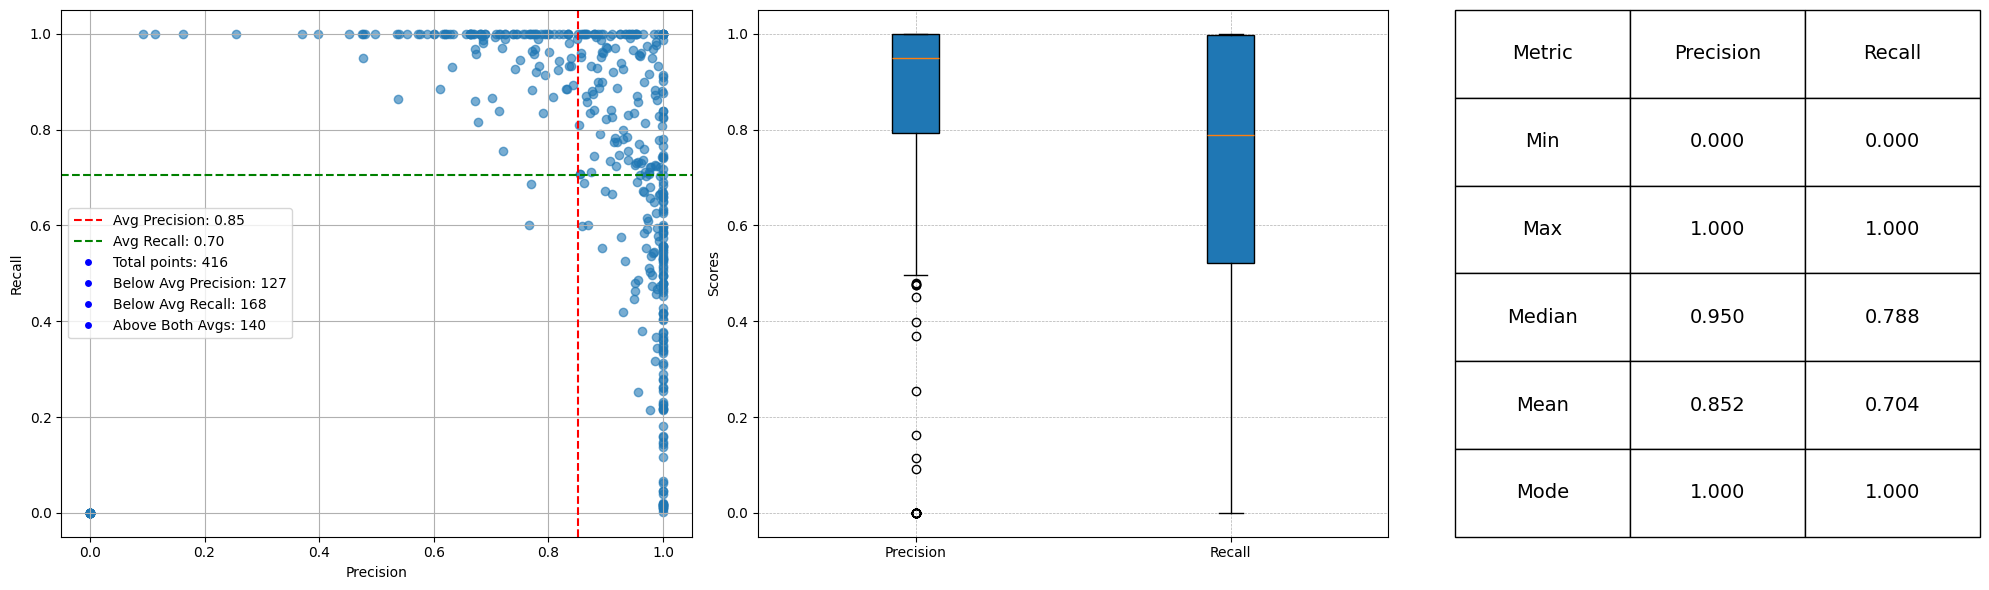

In [6]:
average_precision_fields = df_llama2['avg_precision_field'].mean()
average_recall_fields = df_llama2['avg_recall_field'].mean()
data_points = len(df_llama2)

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import mode
import numpy as np

def create_plots_with_table_and_boxplot_field(dataframe, avg_precision, avg_recall, total_data_points, save_path):
    fig = plt.figure(figsize=(20, 6))
    gs = fig.add_gridspec(1, 3, width_ratios=[3, 3, 2.5])

    # Scatter plot
    ax1 = fig.add_subplot(gs[0])
    ax1.scatter(dataframe['avg_precision_field'], dataframe['avg_recall_field'], alpha=0.6)
    ax1.set_xlabel('Precision')
    ax1.set_ylabel('Recall')
    ax1.grid(True)
    ax1.axvline(x=avg_precision, color='r', linestyle='--', label=f'Avg Precision: {avg_precision:.2f}')
    ax1.axhline(y=avg_recall, color='g', linestyle='--', label=f'Avg Recall: {avg_recall:.2f}')

    # Calculate additional metrics for the legend
    points_below_avg_precision = dataframe[dataframe['avg_precision_field'] < avg_precision].shape[0]
    points_below_avg_recall = dataframe[dataframe['avg_recall_field'] < avg_recall].shape[0]
    points_above_both = dataframe[(dataframe['avg_precision_field'] > avg_precision) & (dataframe['avg_recall_field'] > avg_recall)].shape[0]

    # Create custom legend entries
    custom_lines = [mlines.Line2D([], [], color='r', linestyle='--', markersize=15, label=f'Avg Precision: {avg_precision:.2f}'),
                    mlines.Line2D([], [], color='g', linestyle='--', markersize=15, label=f'Avg Recall: {avg_recall:.2f}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Total points: {data_points}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Below Avg Precision: {points_below_avg_precision}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Below Avg Recall: {points_below_avg_recall}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Above Both Avgs: {points_above_both}')]

    # Add the custom legend to the plot
    ax1.legend(handles=custom_lines, loc='center left')

    # Box plot
    ax2 = fig.add_subplot(gs[1])
    ax2.boxplot(
        [dataframe['avg_precision_field'], dataframe['avg_recall_field']],
        patch_artist=True,
        labels=['Precision', 'Recall']
    )
    ax2.set_ylabel('Scores')
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Prepare data for the table
    stats_precision = get_statistics(dataframe['avg_precision_field'].dropna())
    stats_recall = get_statistics(dataframe['avg_recall_field'].dropna())

    # Table data
    table_data = [
        ["Min", stats_precision[0], stats_recall[0]],
        ["Max", stats_precision[1], stats_recall[1]],
        ["Median", stats_precision[2], stats_recall[2]],
        ["Mean", stats_precision[3], stats_recall[3]],
        ["Mode", stats_precision[4] or "N/A", stats_recall[4] or "N/A"]
    ]

    ax3 = fig.add_subplot(gs[2])
    ax3.axis('off')
    table = ax3.table(cellText=table_data, colLabels=['Metric', 'Precision', 'Recall'], cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches="tight")
    plt.show()

def format_statistic(value):
    if value is None or (isinstance(value, np.ndarray) and value.size == 0):
        return "N/A"
    return f"{value:.3f}"

def get_statistics(column):
    mode_result = mode(column, nan_policy='omit')
    mode_val = mode_result.mode if mode_result.mode.size > 0 else None
    return [
        format_statistic(np.min(column)),
        format_statistic(np.max(column)),
        format_statistic(np.median(column)),
        format_statistic(np.mean(column)),
        format_statistic(mode_val)
    ]


create_plots_with_table_and_boxplot_field(df_llama2, average_precision_fields, average_recall_fields, data_points, '/home/grenders95/710/710_project/data/figures/eval/syft_big_set/2llama2_scatter_box_field.png')

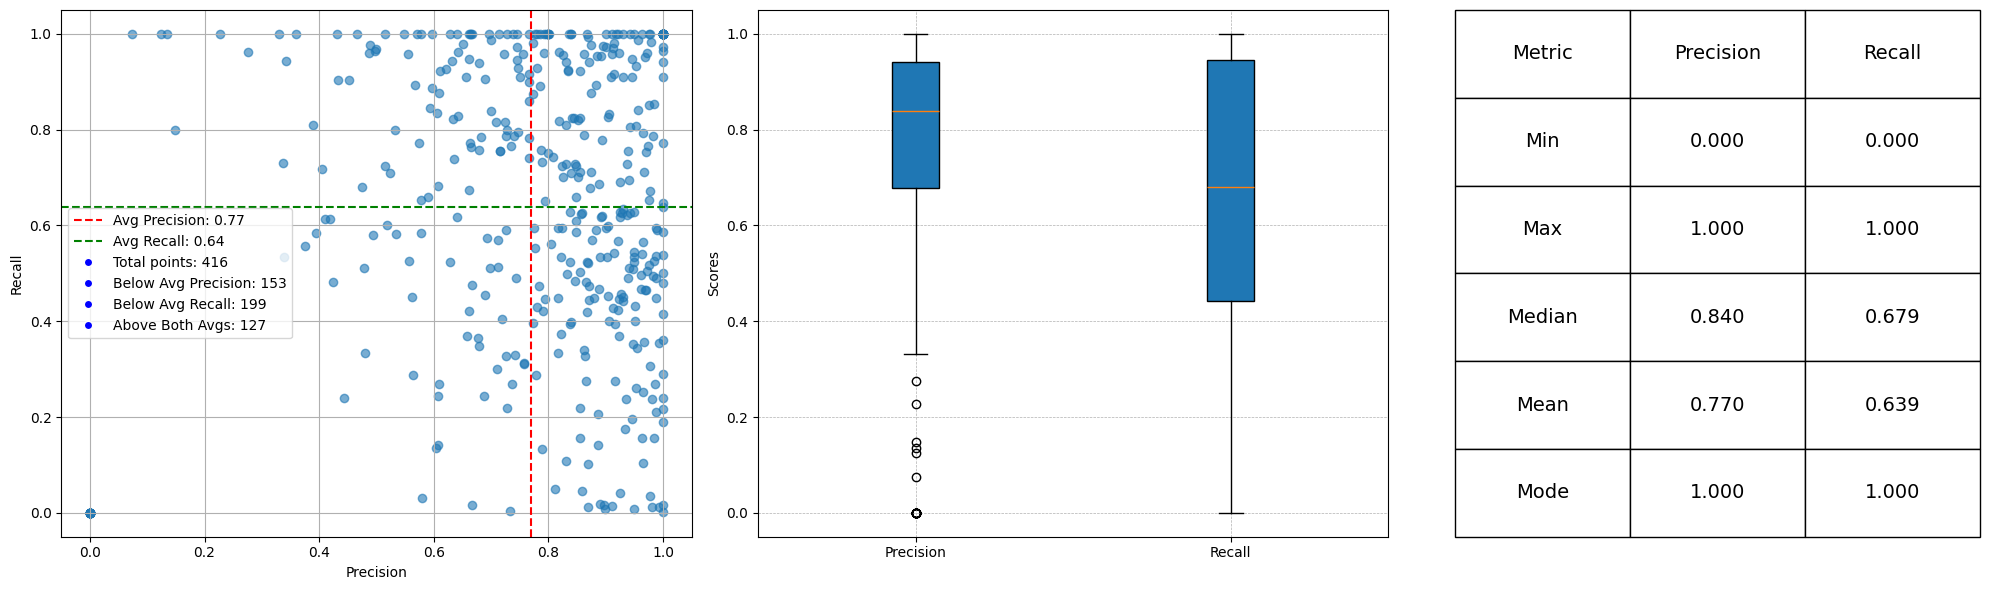

In [7]:
average_precision_values = df_llama2['avg_precision_value'].mean()
average_recall_values = df_llama2['avg_recall_value'].mean()
data_points = len(df_llama2)

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import mode
import numpy as np

def create_plots_with_table_and_boxplot_value(dataframe, avg_precision, avg_recall, data_points, save_path):
    fig = plt.figure(figsize=(20, 6))
    gs = fig.add_gridspec(1, 3, width_ratios=[3, 3, 2.5])

    # Scatter plot
    ax1 = fig.add_subplot(gs[0])
    ax1.scatter(dataframe['avg_precision_value'], dataframe['avg_recall_value'], alpha=0.6)
    ax1.set_xlabel('Precision')
    ax1.set_ylabel('Recall')
    ax1.grid(True)
    ax1.axvline(x=avg_precision, color='r', linestyle='--', label=f'Avg Precision: {avg_precision:.2f}')
    ax1.axhline(y=avg_recall, color='g', linestyle='--', label=f'Avg Recall: {avg_recall:.2f}')

    # Calculate additional metrics for the legend
    points_below_avg_precision = dataframe[dataframe['avg_precision_value'] < avg_precision].shape[0]
    points_below_avg_recall = dataframe[dataframe['avg_recall_value'] < avg_recall].shape[0]
    points_above_both = dataframe[(dataframe['avg_precision_value'] > avg_precision) & (dataframe['avg_recall_value'] > avg_recall)].shape[0]

    # Create custom legend entries
    custom_lines = [mlines.Line2D([], [], color='r', linestyle='--', markersize=15, label=f'Avg Precision: {avg_precision:.2f}'),
                    mlines.Line2D([], [], color='g', linestyle='--', markersize=15, label=f'Avg Recall: {avg_recall:.2f}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Total points: {data_points}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Below Avg Precision: {points_below_avg_precision}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Below Avg Recall: {points_below_avg_recall}'),
                    mlines.Line2D([], [], color='white', marker='o', markerfacecolor='blue', label=f'Above Both Avgs: {points_above_both}')]

    # Add the custom legend to the plot
    ax1.legend(handles=custom_lines, loc='center left')

    # Box plot
    ax2 = fig.add_subplot(gs[1])
    ax2.boxplot(
        [dataframe['avg_precision_value'], dataframe['avg_recall_value']],
        patch_artist=True,
        labels=['Precision', 'Recall']
    )
    ax2.set_ylabel('Scores')
    ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Prepare data for the table
    stats_precision = get_statistics(dataframe['avg_precision_value'].dropna())
    stats_recall = get_statistics(dataframe['avg_recall_value'].dropna())

    # Table data
    table_data = [
        ["Min", stats_precision[0], stats_recall[0]],
        ["Max", stats_precision[1], stats_recall[1]],
        ["Median", stats_precision[2], stats_recall[2]],
        ["Mean", stats_precision[3], stats_recall[3]],
        ["Mode", stats_precision[4] or "N/A", stats_recall[4] or "N/A"]
    ]

    ax3 = fig.add_subplot(gs[2])
    ax3.axis('off')
    table = ax3.table(cellText=table_data, colLabels=['Metric', 'Precision', 'Recall'], cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    plt.tight_layout()
    plt.savefig(save_path, bbox_inches="tight")
    plt.show()

def format_statistic(value):
    if value is None or (isinstance(value, np.ndarray) and value.size == 0):
        return "N/A"
    return f"{value:.3f}"

def get_statistics(column):
    mode_result = mode(column, nan_policy='omit')
    mode_val = mode_result.mode if mode_result.mode.size > 0 else None
    return [
        format_statistic(np.min(column)),
        format_statistic(np.max(column)),
        format_statistic(np.median(column)),
        format_statistic(np.mean(column)),
        format_statistic(mode_val)
    ]

create_plots_with_table_and_boxplot_value(df_llama2, average_precision_values, average_recall_values, data_points, '/home/grenders95/710/710_project/data/figures/eval/syft_big_set/2llama2_scatter_box_value.png')